# Numpy

NumPy is a fundamental package for scientific computing with Python. It contains, among other things:

  * a powerful N-dimensional array object
  * sophisticated operations on arrays
  * tools for integrating C/C++ and Fortran code (not covered in the course)
  * (pseudo-)random number generation (today? if not in the next lectures)
  * linear algebra, Fourier transform, ... (in the next lectures)

NumPy can be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined and this allows NumPy to seamlessly and speedily integrate with a wide variety of projects.

Numpy features a very detailed [documentation](https://numpy.org/doc/stable/user/whatisnumpy.html), with clear examples too.

In [6]:
import numpy as np # import naming convention

## Arrays

Numpy arrays differ from the python lists, Numpy in fact provides:
* full support for multi-dimensional arrays
* closer to hardware implementation (efficiency)
* designed for scientific computation (convenience)

Similary to other programming languages that have a specific focus (e.g. "object-oriented"), arrays in numpy are so central that developing scientific applications can be considered as "array-oriented".

A demonstration of the numpy efficiency:

In [7]:
# standard python
L = range(1000)
%timeit [i**2 for i in L]

# numpy
a = np.arange(1000)
%timeit a**2

165 µs ± 5.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
831 ns ± 8.55 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


A numpy array is a grid of **omogeneous** values (all of the same type), and is indexed by a tuple of non-negative integers.

All standard data types are available ([documentation](https://numpy.org/doc/stable/user/basics.types.html)):

In [8]:
# The type should specified when the array is created
a = np.array([1, 2, 3], 'float64')
print(a, a.dtype, '\n')
a = np.array([1, 2, 3], 'uint32')
print(a, a.dtype, '\n')

# Alternatively, we can let python to infer the type: 
a = np.array([1, 2, 3.3])
print(a, a.dtype, '\n')

# Also complex numbers are allowed
a = np.array([1+2j, 3+4j, 5+6*1j])
print (a, a.dtype, '\n')

# Booleans
a = np.array([True, False, False, True])
print(a, a.dtype, '\n')

# Non-numerical types are also allowed: strings
a = np.array(['bonjour messieurs dames', 'Hello', 'Hallo'])
print(a, a.dtype, '\n')


[1. 2. 3.] float64 

[1 2 3] uint32 

[1.  2.  3.3] float64 

[1.+2.j 3.+4.j 5.+6.j] complex128 

[ True False False  True] bool 

['bonjour messieurs dames' 'Hello' 'Hallo'] <U23 



### Dimensions

The number of dimensions is called the **rank** of the array.
The **shape** of an array is a tuple of integers giving the size of the array along each dimension.

- 1D arrays:

In [9]:
a1 = np.array([0, 1, 2, 3])
print("array: \n", a1)
print("rank:", a1.ndim)
print("shape:", a1.shape)
print("size of the first dimension (axis):", len(a1)) # not recommended in >1D

array: 
 [0 1 2 3]
rank: 1
shape: (4,)
size of the first dimension (axis): 4


 - 2D arrays:

In [10]:
a2_3 = np.array([[0, 1, 2], [3, 4, 5]])
print("2 x 3 array: \n", a2_3)
print("rank:", a2_3.ndim)
print("shape:", a2_3.shape)
print("size of the first dimension (axis):", len(a2_3))

2 x 3 array: 
 [[0 1 2]
 [3 4 5]]
rank: 2
shape: (2, 3)
size of the first dimension (axis): 2


- 3D arrays:

In [11]:
a2_3_4 = np.array([[[1, 10, 100, 1000], [2, 20, 200, 2000], [3, 30, 300, 3000]], 
                   [[4, 40, 400, 4000], [5, 50, 500, 5000], [6, 60, 600, 6000]]])
print("2 x 3 x 4 array:\n", a2_3_4)
print("rank:", a2_3_4.ndim)
print("shape:", a2_3_4.shape)
print("size of the first dimension (axis):", len(a2_3_4))

2 x 3 x 4 array:
 [[[   1   10  100 1000]
  [   2   20  200 2000]
  [   3   30  300 3000]]

 [[   4   40  400 4000]
  [   5   50  500 5000]
  [   6   60  600 6000]]]
rank: 3
shape: (2, 3, 4)
size of the first dimension (axis): 2


### Initializing arrays

Arrays can be created from lists, but also lists can be obtained by arrays (however, remember that the two are not equivalent because a numpy array is **not** a list):

In [12]:
l = [0, 1, 2, 3]
a = np.array(l)
print(a.tolist(), type(a.tolist()))

[0, 1, 2, 3] <class 'list'>


Initialization by using the numpy and linspace methods:

In [13]:
# evenly spaced:
print(np.arange(1, 9, 2)) # same as "range": start, end (exclusive), step

# or by number of points:
print(np.linspace(0, 1, 2)) # start, end, num-points (to be used for plotting f(x))

[1 3 5 7]
[0. 1.]


Initialization of the most common arrays:

In [14]:
# 3x3 matrix of 1's
ones = np.ones((3, 3))
print(ones, '\n')

# 2x2 matrix of 0's
zeros = np.zeros((2, 2))
print(zeros, '\n')

# 3x3 unitary matrix
unity3d = np.eye(3)
#unity3d = np.identity(3) # np.identity calls np.eye, so the two are equivalent
print(unity3d, '\n')

# generic diagonal matrix
diagonal = np.diag(np.array([1, 20, 3, 4]))
print(diagonal, '\n')

# from list comprehensions
array = np.array([(i, j) for i in range(2) for j in range(3)])
print(array, '\n')

# from a function
fromfunct = np.fromfunction(lambda i, j: (i - 2)**2 + (j - i)**2, (5, 5))
print(fromfunct, '\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0.]
 [0. 0.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[ 1  0  0  0]
 [ 0 20  0  0]
 [ 0  0  3  0]
 [ 0  0  0  4]] 

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]] 

[[ 4.  5.  8. 13. 20.]
 [ 2.  1.  2.  5. 10.]
 [ 4.  1.  0.  1.  4.]
 [10.  5.  2.  1.  2.]
 [20. 13.  8.  5.  4.]] 



### Reshaping and Concatenation

An initial 1D array can be reshaped to a multi-dimensional array:

In [15]:
a = np.arange(0, 6)
m = a.reshape(3, 2) 
# N.B.: if the parameters of the reshaping are not appropriate, reshaping fails

print("original:", a, '\n')
print("reshaped:", m, '\n')

a_from_m = m.flatten()
print("flattened array (back to original):", a_from_m, '\n')

original: [0 1 2 3 4 5] 

reshaped: [[0 1]
 [2 3]
 [4 5]] 

flattened array (back to original): [0 1 2 3 4 5] 



The operation of concatenating two arrays is trivial in 1D, much less so in nD:

In [16]:
# 1D concatenation
a = np.array([1, 2])
b = np.array([3, 4, 5, 6])
c = np.array([7, 8, 9])
print("1D concatenation:", np.concatenate((a, b, c)),'\n')

# nD concatenation
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
# if no axis is specified, concatenations occurs on the 1st dimension
print("default 2D concatenation:",'\n', np.concatenate((a, b)),'\n')

print("concatenation along the first axis:",'\n', np.concatenate((a, b), axis=0), '\n')
print("concatenation along the second axis:",'\n', np.concatenate((a, b), axis=1), '\n')

1D concatenation: [1 2 3 4 5 6 7 8 9] 

default 2D concatenation: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the first axis: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the second axis: 
 [[1 2 5 6]
 [3 4 7 8]] 



### Copies and views

Being **mutable objects**, numpy arrays can have **copies** and **views**:

In [17]:
a = np.array([1, 2, 3])
b = a # this is a view

c = a.copy() # this is a copy


# The changes applied to the array a modify also the array b 
# (which, as a matter of fact, are the same PyObject)
a[0] = 7
print(a, b, c)

# ... and viceversa
b[1] = 7
print(a, b, c)

# changes on c do not modify the array a
c[0] = 9
print(a, b, c)

# The python object is the same for a and b, but different for c:
print("Are a and b the same object?", np.may_share_memory(a, b))
print("Are a and c the same object?", np.may_share_memory(a, c))

# Exercise: check if np.array.reshape returns a view or a copy



[7 2 3] [7 2 3] [1 2 3]
[7 7 3] [7 7 3] [1 2 3]
[7 7 3] [7 7 3] [9 2 3]
Are a and b the same object? True
Are a and c the same object? False


Please remember that, with numpy objects, the `id()` function does not always work. To check whether two variables point to the same PyObject, use `np.may_share_memory()`.

### Indexing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [18]:
a = np.arange(10)
print(a[0], a[2], a[-1])

# reminder: the [start:stop:step] works as well. 
# step can be negative and a reverse sequence is thus obtained
print(a[2:9:3])
print(a[::-1])

0 2 9
[2 5 8]
[9 8 7 6 5 4 3 2 1 0]


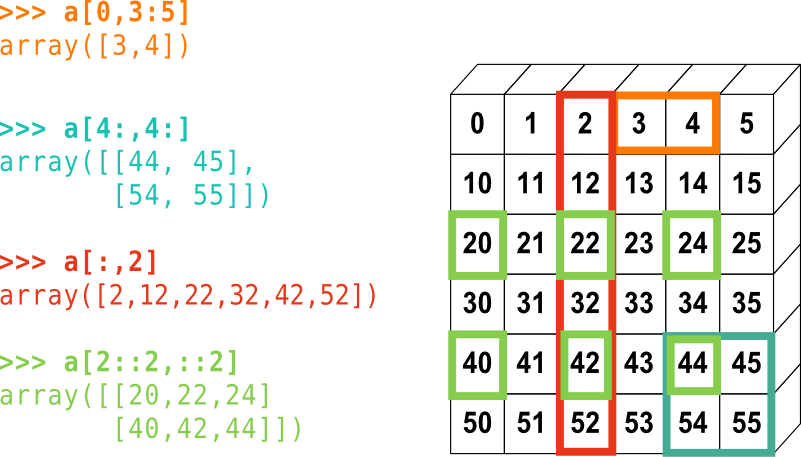

In [19]:
from IPython.display import Image
Image("numpy_indexing.png")

In [20]:
# Exercise: create here the np array used as example above

For multidimensional arrays, indexes are tuples of integers.

Note:
* in 2D, the first dimension corresponds to rows, the second to columns.
* for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.

### Slicing

A slicing operation creates a **view** on the original array, which is just a way of accessing array data.
When modifying a view, the original array is modified as well.

In [21]:
a = np.diag(np.arange(3))
print(a, '\n')
print(a[1, 1], '\n')
print(a[2], '\n')

# slice the original array, creating a view
b = a[1:, 1:]
print(b, '\n')

# modifying the view also modifies the original array
b[-1, -1] = 10
print(a, '\n')

# check if b is actually a view of a
print("Are a and b the same object?", np.may_share_memory(a, b))

[[0 0 0]
 [0 1 0]
 [0 0 2]] 

1 

[0 0 2] 

[[1 0]
 [0 2]] 

[[ 0  0  0]
 [ 0  1  0]
 [ 0  0 10]] 

Are a and b the same object? True


### Fancy indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (masks). This method is called fancy indexing, and it creates **copies**, not views.

In [22]:
a = np.arange(0, 21, 2)
print("original array:", a,'\n')

mask = (a % 3 == 0)
print("the mask:", mask,'\n')

filtered_a = a[mask]
# equivalent to a[a%3==0]
print("the filtered array:", filtered_a,'\n')

# verify that fancy indexing creates copies
print("Are a and filtered_a the same object?", np.may_share_memory(a, filtered_a), '\n')

# Indexing with a mask can be very useful to assign a new value to a sub-array
a[a % 3 == 0] = -1
print("the modified array:", a, '\n')

original array: [ 0  2  4  6  8 10 12 14 16 18 20] 

the mask: [ True False False  True False False  True False False  True False] 

the filtered array: [ 0  6 12 18] 

Are a and filtered_a the same object? False 

the modified array: [-1  2  4 -1  8 10 -1 14 16 -1 20] 



Indexing can be done with an array of integers, where the same index can be repeated several times.

In [23]:
a = np.arange(0, 100, 10)
l = [2, 3, 2, 4, 2] # l is a python list
print("selection of indexes: ", a[l], '\n')


selection of indexes:  [20 30 20 40 20] 



When a new array is created by indexing with an array of integers, the new array has the same shape as the array of integers:

In [24]:
a = np.arange(0, 20, 2)
idx = np.array([[3, 4],[9, 7]]) # note the shape and the ordering
print(a[idx])

[[ 6  8]
 [18 14]]


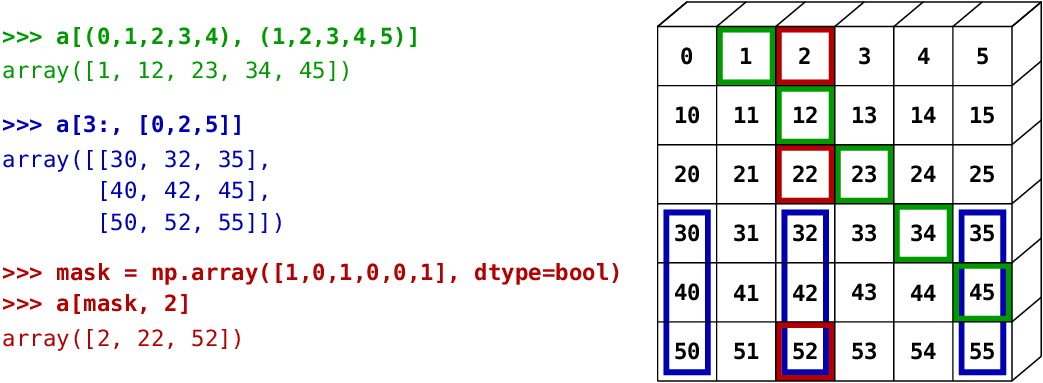

In [25]:
# an exstensive example
from IPython.display import Image
Image("numpy_fancy_indexing.png")

## Operations with arrays

### Basic operations

By default, all operations (additions, subtractions, multiplications, ...) with arrays are performed element-wise:

In [26]:
# operations with scalars
a = np.arange(4)
print(a, '\n')
print(a * 5, '\n')
print(2**a, '\n')

[0 1 2 3] 

[ 0  5 10 15] 

[1 2 4 8] 



In [27]:
# operations among 1D arrays. Also in this case, all operations are element-wise
a = np.arange(4)
b = np.ones(4) + 1
print(a, b)
print("a - b:", a - b)
print("a * b:", a * b)

[0 1 2 3] [2. 2. 2. 2.]
a - b: [-2. -1.  0.  1.]
a * b: [0. 2. 4. 6.]


Be careful that, since operations are element-wise in all dimensions, array multiplication is not matrix multiplication:

In [28]:
ones = np.ones((3,3))
print ('the original matrix:','\n',ones,'\n')

print ('the "*" product: ','\n',ones*ones,'\n')

print ('the proper matrix product: ','\n',ones.dot(ones),'\n')

the original matrix: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

the "*" product:  
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

the proper matrix product:  
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]] 



### Other operations

- array comparisons:

In [29]:
# element-wise
print('equal?:', np.array([1, 3, 2, 5]) == np.array([3, 1, 2, 5]))
print('greater than?:', np.array([1, 3, 2, 5]) > np.array([3, 1, 2, 1]))

# array-wise
print(np.array_equal(np.array([1, 3, 2, 5]), np.array([3, 1, 2, 1])))

equal?: [False False  True  True]
greater than?: [False  True False  True]
False


- logical operations:

In [34]:
# logical
a = np.array([1, 1, 0, 0], bool)
b = np.array([1, 0, 1, 0], bool)
print("logical OR:", np.logical_or(a, b))
print("logical AND:", np.logical_and(a, b))

logical OR: [ True  True  True False]
logical AND: [ True False False False]


- application of functions on arrays:

In [31]:
# mathematical functions re-implemented in numpy
a = np.arange(1, 9)
print("sin:", np.sin(a))
print("log:", np.log(a))

# works all dimensions
m = a.reshape(2, 4)
print("exp:", np.exp(m))

sin: [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825]
log: [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154]
exp: [[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01]
 [1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03]]


- matrices:

In [32]:
# extracting off-diagonal terms
print(np.arange(16).reshape(4,4))
a = np.tril(np.arange(16).reshape(4, 4), +2) # play with the last parameter (sign and value)
#a= np.triu(np.arange(16).reshape(4, 4), -1) # play with the last parameter (sign and value)
print ("a:", '\n', a , '\n')

print ("transpose:", '\n', a.T , '\n') # a.T is a view

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
a: 
 [[ 0  1  2  0]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

transpose: 
 [[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 0  7 11 15]] 



N.B.: a linear algebra package exists in numpy and is called `numpy.linalg`. However, in terms of performance, the package included in `scipy` (the library subject of a future class), also called `scipy.linalg`, is better and more efficient.

### Reductions

Operations that reduce the dimensionality of arrays are called *reductions*. The reduction functions operate on the elements of an array and return a (set of) scalar(s), and are available either as methods of the array class or as numpy functions.

In dimensions higher than one, the axis has to be specified.

In [33]:
a = np.arange(1,7)
print(a)
print("sum:", a.sum(), np.sum(a))
print("min:", a.min(), np.min(a))
print("max:", a.max(), np.max(a))
print("index of the minimum argument:", a.argmin(), np.argmin(a))
print("index of the maximum argument:", a.argmax(), np.argmax(a))
print("mean:", a.mean(), np.mean(a))
print("median:", np.median(a)) # median is not a method of the array class..
print("standard deviation:", a.std(), np.std(a))
# and many others...

[1 2 3 4 5 6]
sum: 21 21
min: 1 1
max: 6 6
index of the minimum argument: 0 0
index of the maximum argument: 5 5
mean: 3.5 3.5
median: 3.5
standard deviation: 1.707825127659933 1.707825127659933


In [ ]:
# these functions work in higher dimensions, too

m = a.reshape(3,2)
print(m, '\n')

print("sum along the columns:", m.sum(axis=0))
print("sum along the rows:", m.sum(axis=1))

### Broadcasting

We have seen element-wise operations on arrays, which work only on arrays of the same rank and shape.
Nevertheless, it’s also possible to do operations on arrays of different sizes if NumPy can transform (*broadcast*) these arrays so that they all have the same size.

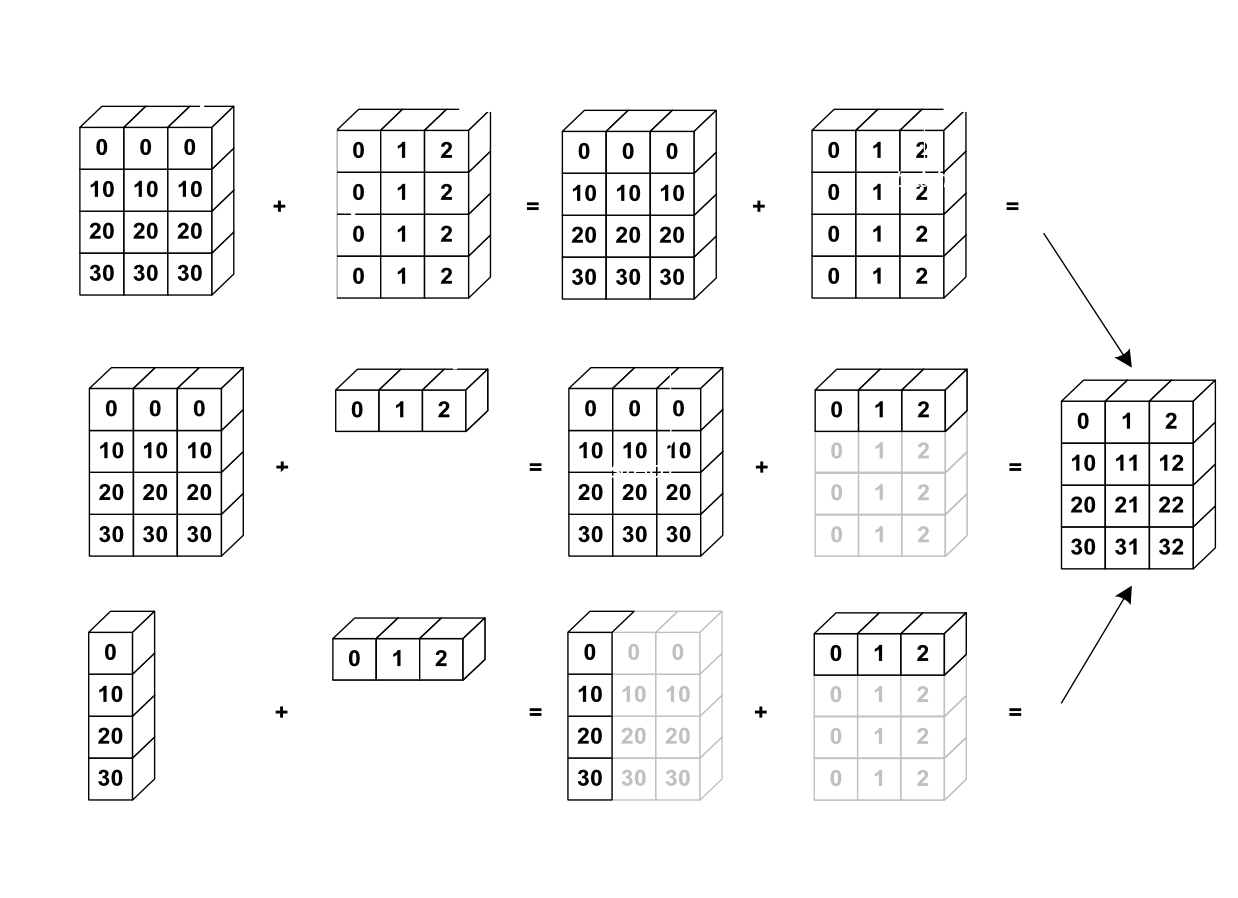

In [35]:
from IPython.display import Image
Image("numpy_broadcasting.png")

In [36]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T # check what exactly np.tile does on the documentation 
print("original array:", '\n', a, '\n')
print("broadcasted sum :", '\n', a + np.arange(3), '\n')

original array: 
 [[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

broadcasted sum : 
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]] 



### More on shape manipulation

In [ ]:
# adding a dimension (useful for linear algebra)
print("new dim along axis 1:", '\n', np.arange(1,4)[:,np.newaxis], '\n')
print("new dim along axis 0:", '\n', np.arange(1,4)[np.newaxis,:], '\n')

# resizing
print ("resizing:", '\n', np.resize(np.arange(4), (9,)), '\n')


# Random numbers

There are two modules for (pseudo) random numbers that are commonly used. When all you need is to generate random numbers from some distribution, the `numpy.random` moodule is the simplest to use. When you need more information realted to a distribution such as quantiles or the PDF, you can use the `scipy.stats` module, which will see later in the course.

In [46]:
import numpy.random as npr
npr.seed(123) # fix seed for reproducible result

### Random data

In [ ]:
# random values from a uniform distrubtion in [0.0, 1.0) for a given shape
print ("uniform:",'\n', npr.rand(3,4),'\n') # shape=(3,4)
 
# random values from a standard normal distrubtion  for a given shape
print ("normal:",'\n', npr.randn(2,5),'\n') # shape=(2,5)

# random integers between "low" and "high" edges for a given shape (size)
print ("integers:",'\n', npr.randint(1,50,size=(3,6)),'\n') # shape=(3,6)

### Operations on arrays

In [ ]:
# randomly shuffling a vector
x = np.arange(10)
npr.shuffle(x)
print ("reshuffling:",'\n', x,'\n')
# npr.permutation works similarly

# Generates a random sample from a given 1-D array (without replacement)
x = np.arange(10,20)
print ("choice w/o replace",'\n',npr.choice(x, 10, replace=False),'\n')

# Generates a random sample of a given dimension from a given 1-D array
print ("choice w/ replace",'\n',npr.choice(x, (5, 10), replace=True),'\n') # this is default

## Probability Density Functions

numbers can be drawn from basically any common PDF (normal, binomial, chisquare, etc..)

In [4]:
# exponential
print ("exponential:",'\n', npr.exponential(10, size=(3,2)),'\n')

exponential: 
 [[10.06218061 18.93339102]
 [12.89005503  9.44236376]
 [12.8173034   3.90023319]] 



In [48]:
# tossing a dice
roll = 1./6
x = npr.multinomial(20000, [roll]*6, size=2)
print ("frequencies of 6-faces dice tossing (two players):",'\n', x)

frequencies of 6-faces dice tossing (two players): 
 [[3333 3373 3392 3326 3268 3308]
 [3298 3349 3366 3297 3408 3282]]


In [37]:
# toy example - estimating pi inefficiently
n = int(1e6)
x = npr.uniform(-1,1,(n,2))
4.0*np.sum(x[:,0]**2 + x[:,1]**2 < 1)/n

3.145672